## Loading Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Pima Indians Diabetes Database

The dataset is available at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. It is part of a large dataset. Phoenix, a major city in the State of Arizona in the USA, is one of the locations where the data was collected. The dataset contains observations from Pima Indian women who are aged 21 and over.

The dataset consists of 768 observations and 8 numerical independent variables. The target variable is specified as "Outcome", where `1` indicates a positive diabetes test result and `0` indicates a negative result.

## Independent Variables

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)

## Target Variable

- **Outcome**: Class variable (0 - 1), where `1` indicates a positive diabetes test result and `0` indicates a negative result


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


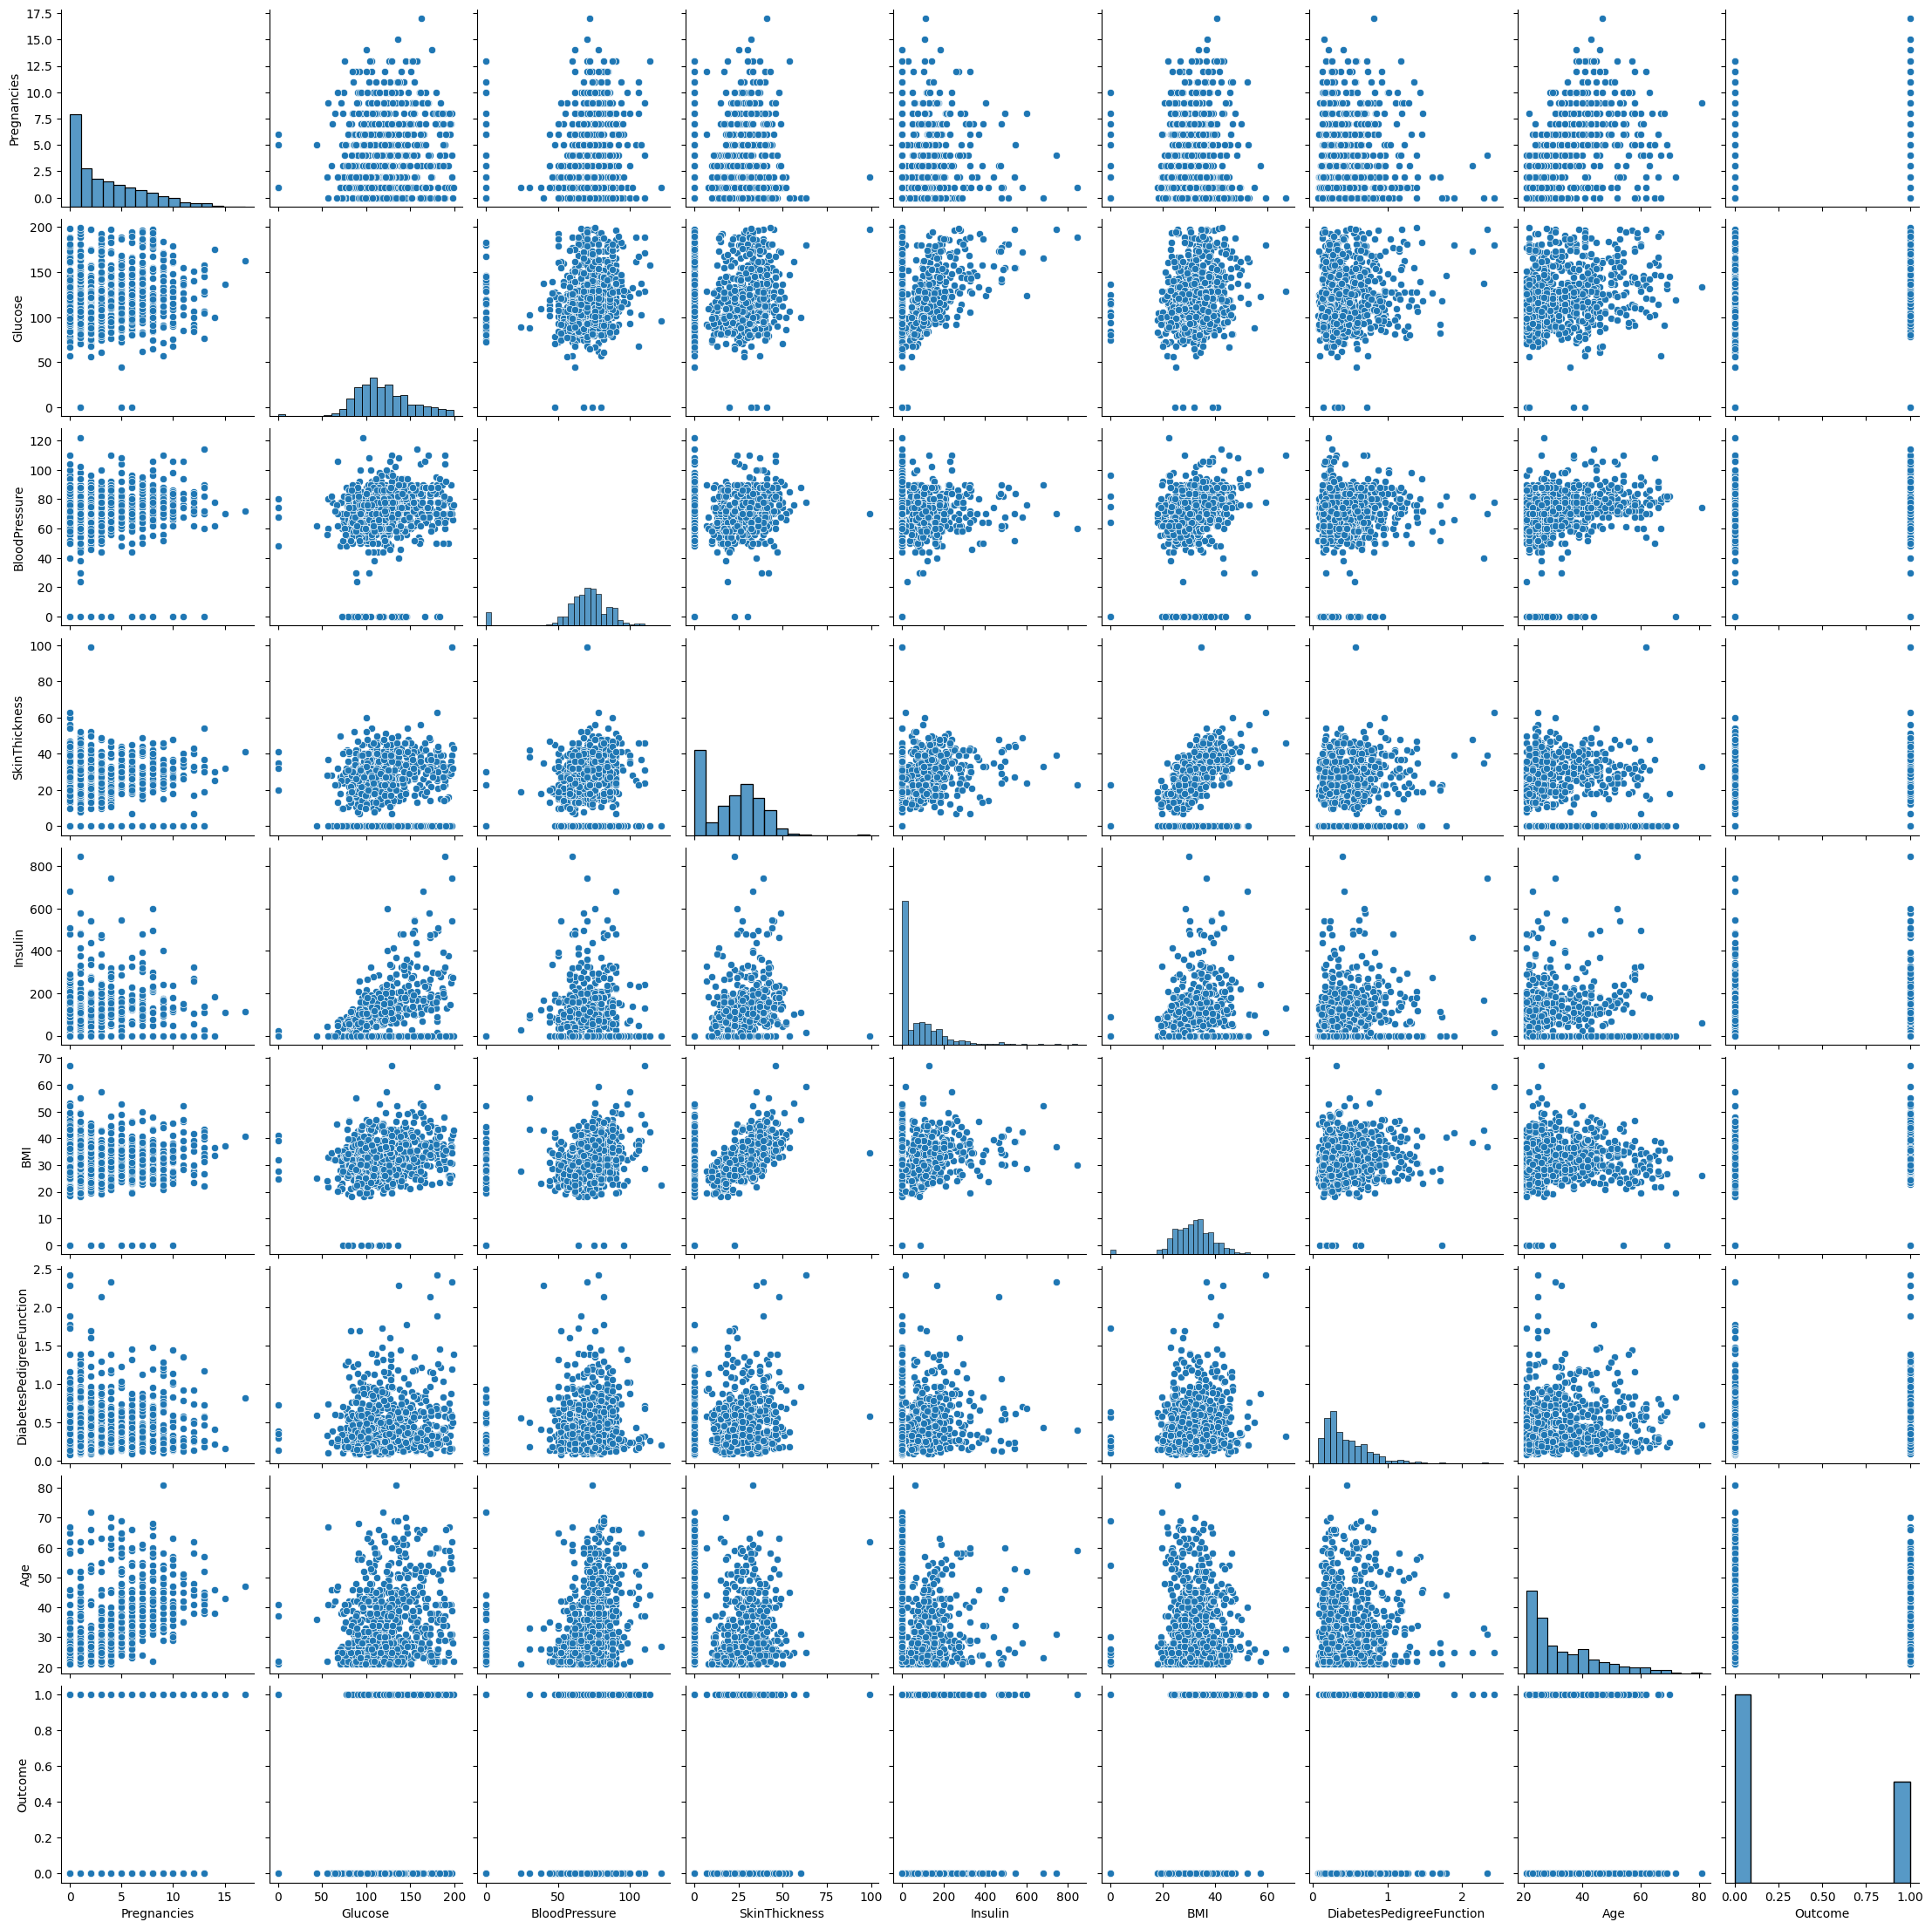

In [8]:
sns.pairplot(df)

In [114]:


def findrelation(x, y, df):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
    
    sns.countplot(x=x, hue=y, data=df, ax=axes[0])
    axes[0].set_title(f"Countplot of {x} with respect to {y}")

    sns.scatterplot(x=x, y=y, data=df, ax=axes[1])
    axes[1].set_title(f"Scatterplot of {x} vs {y}")
    
    sns.boxplot(x=y, y=x, data=df, ax=axes[2])
    axes[2].set_title(f"Boxplot of {x} by {y}")

    sns.violinplot(x=y, y=x, data=df, ax=axes[3])
    axes[3].set_title(f"Violinplot of {x} by {y}")
    
    plt.tight_layout()
    plt.show()




In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

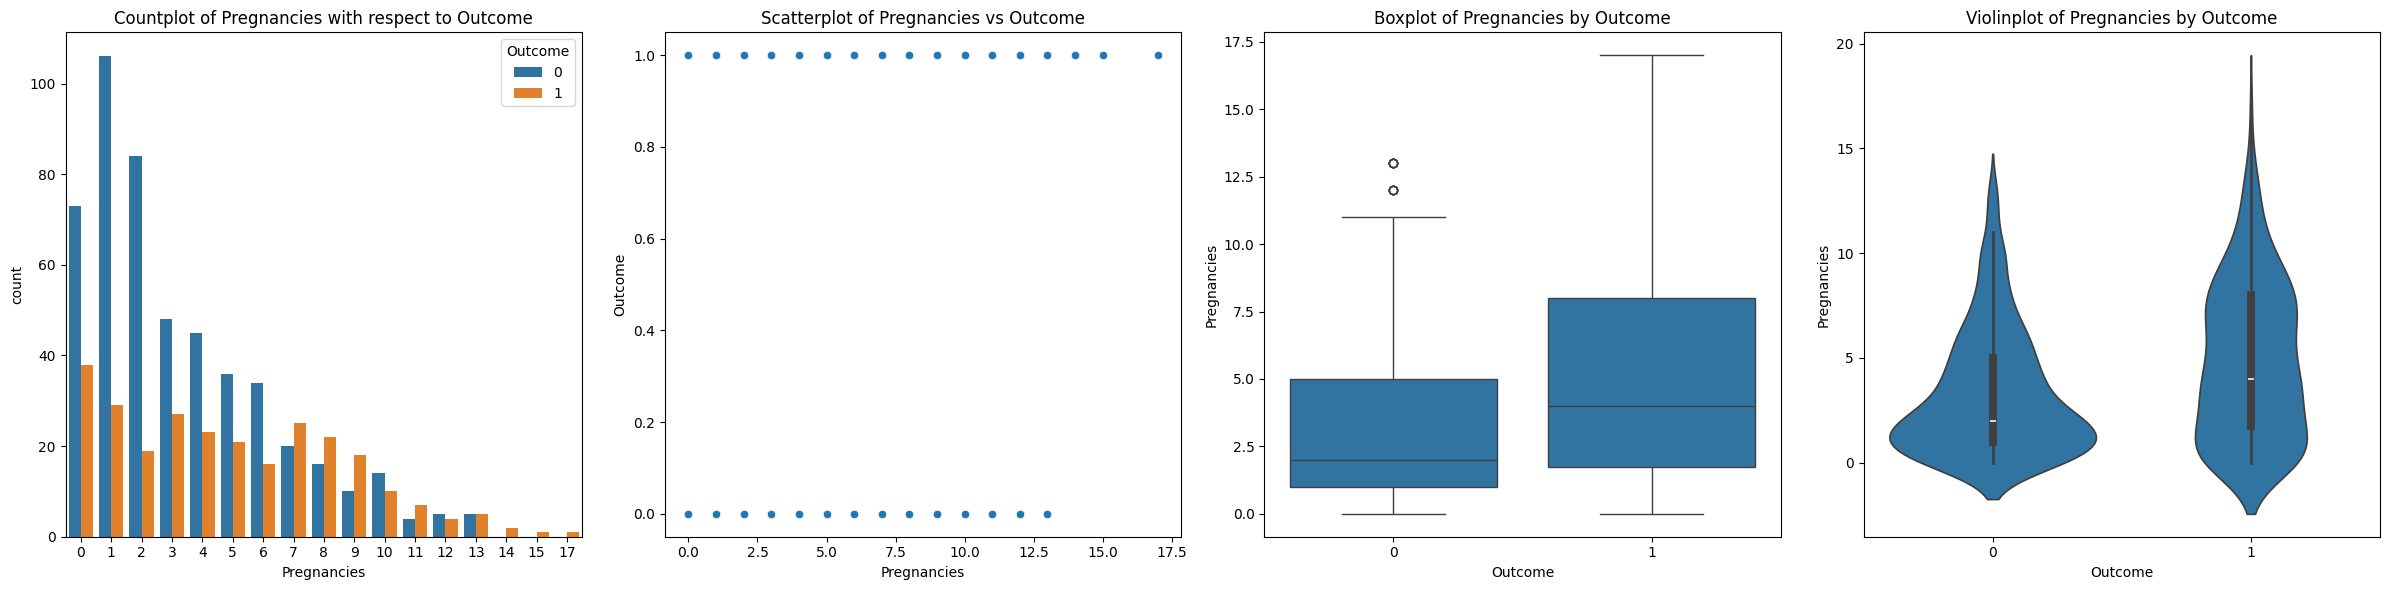

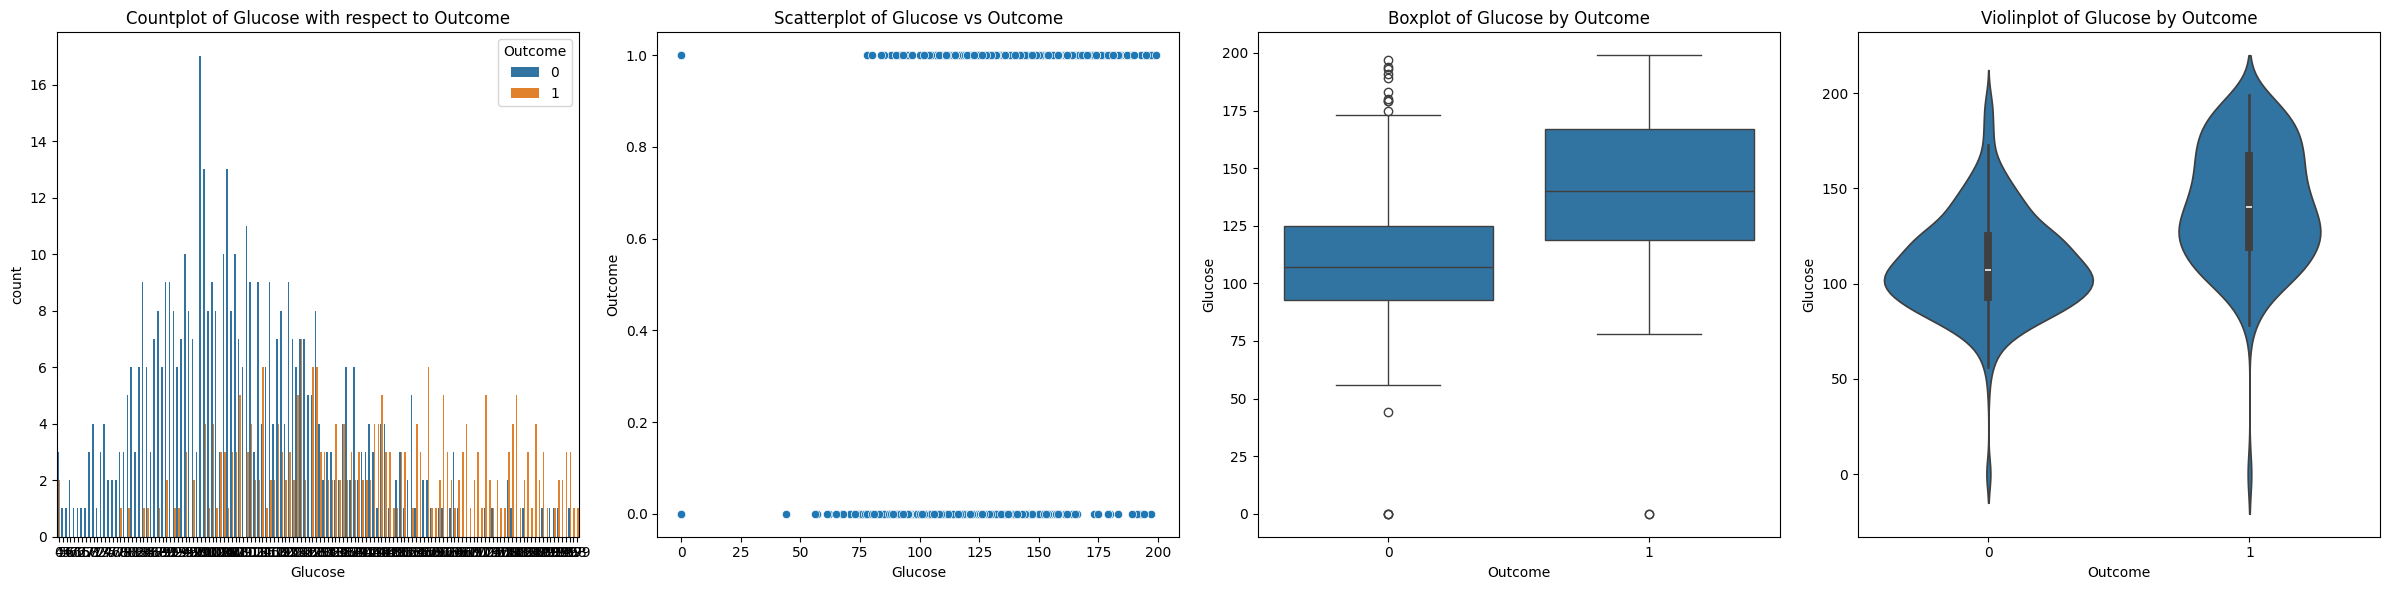

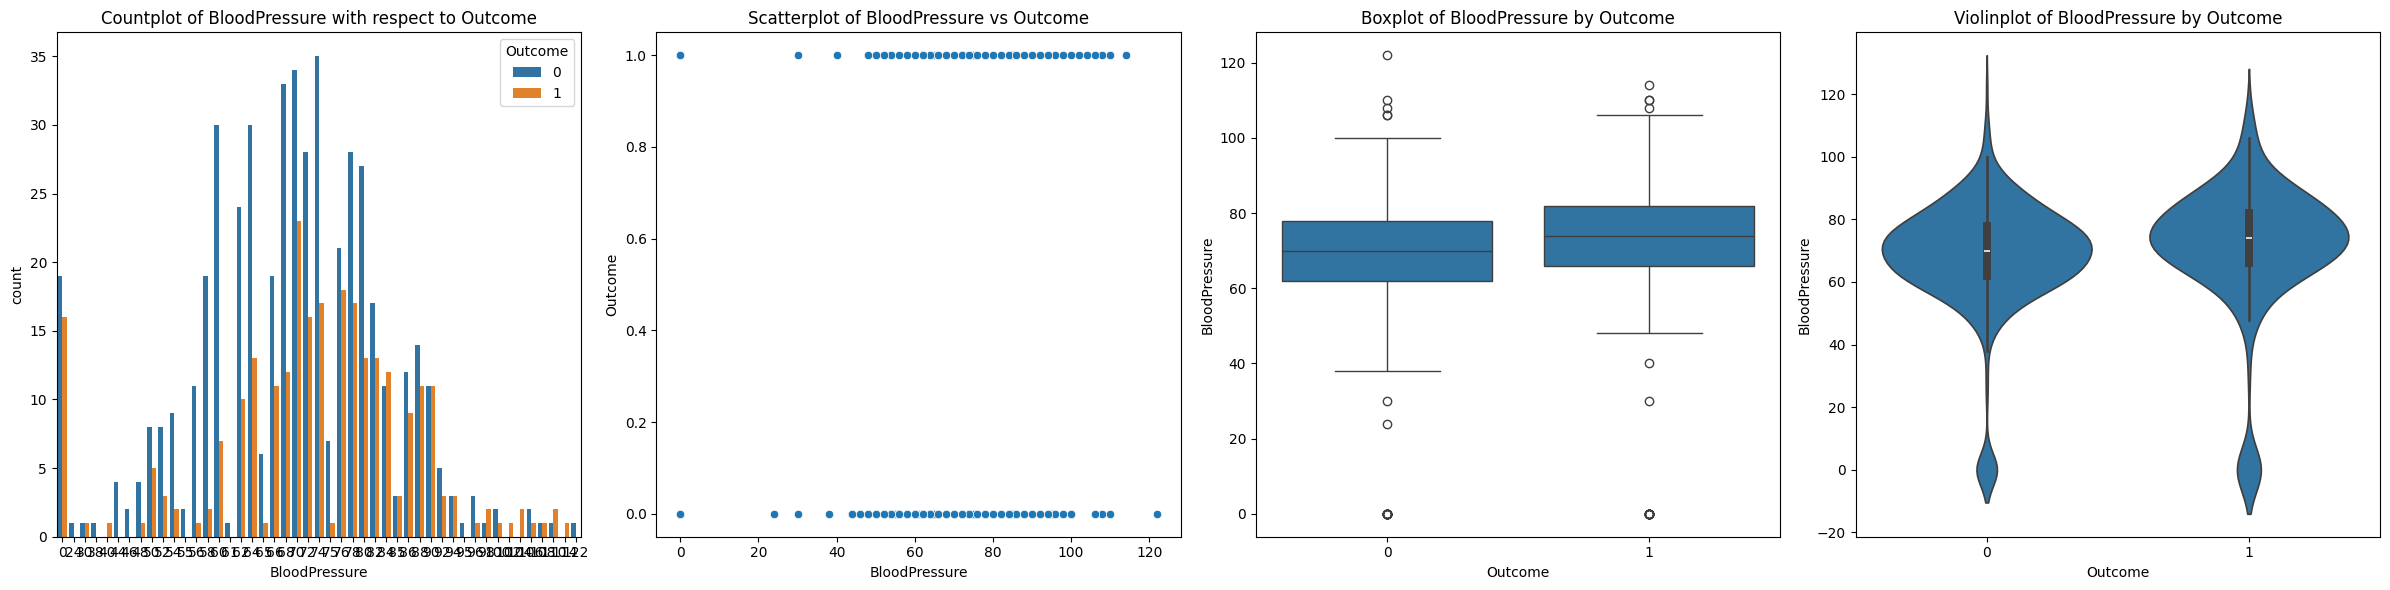

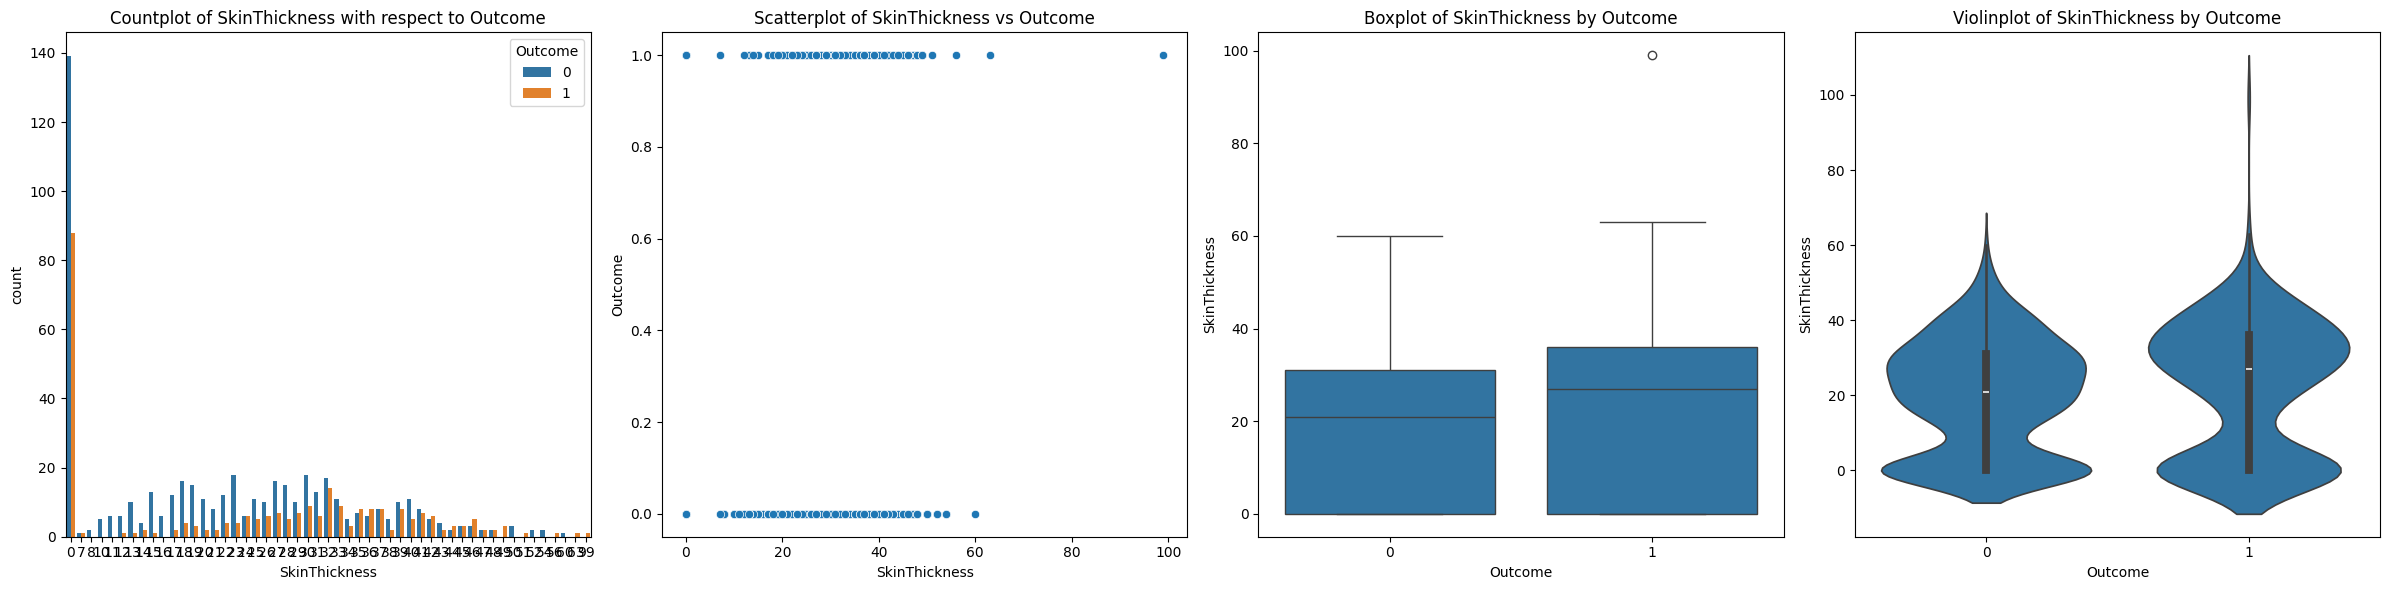

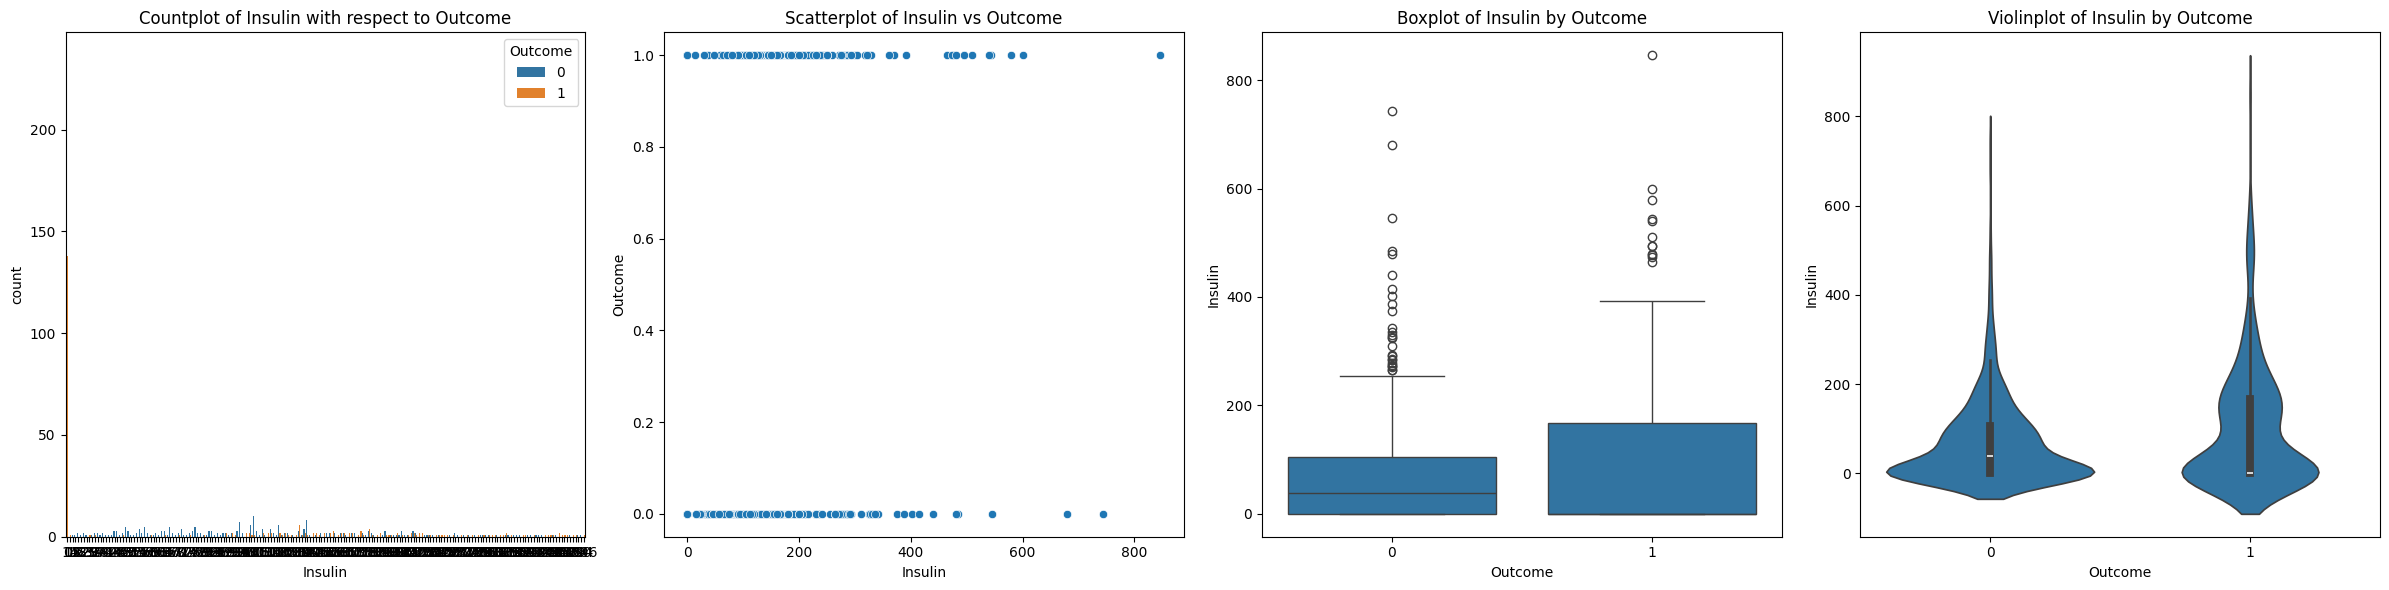

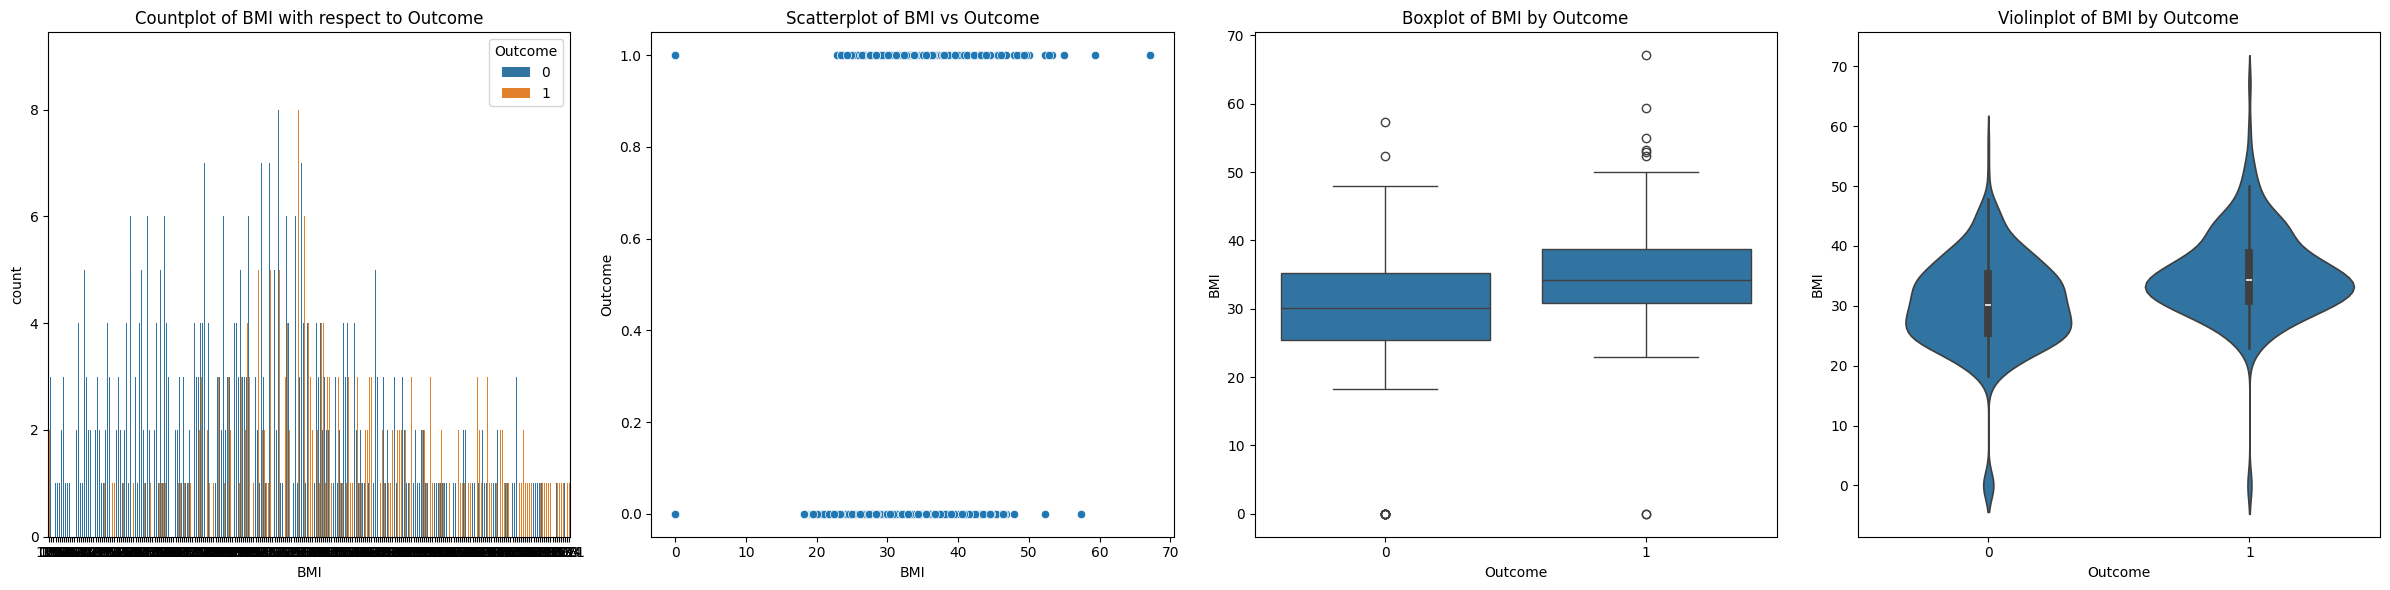

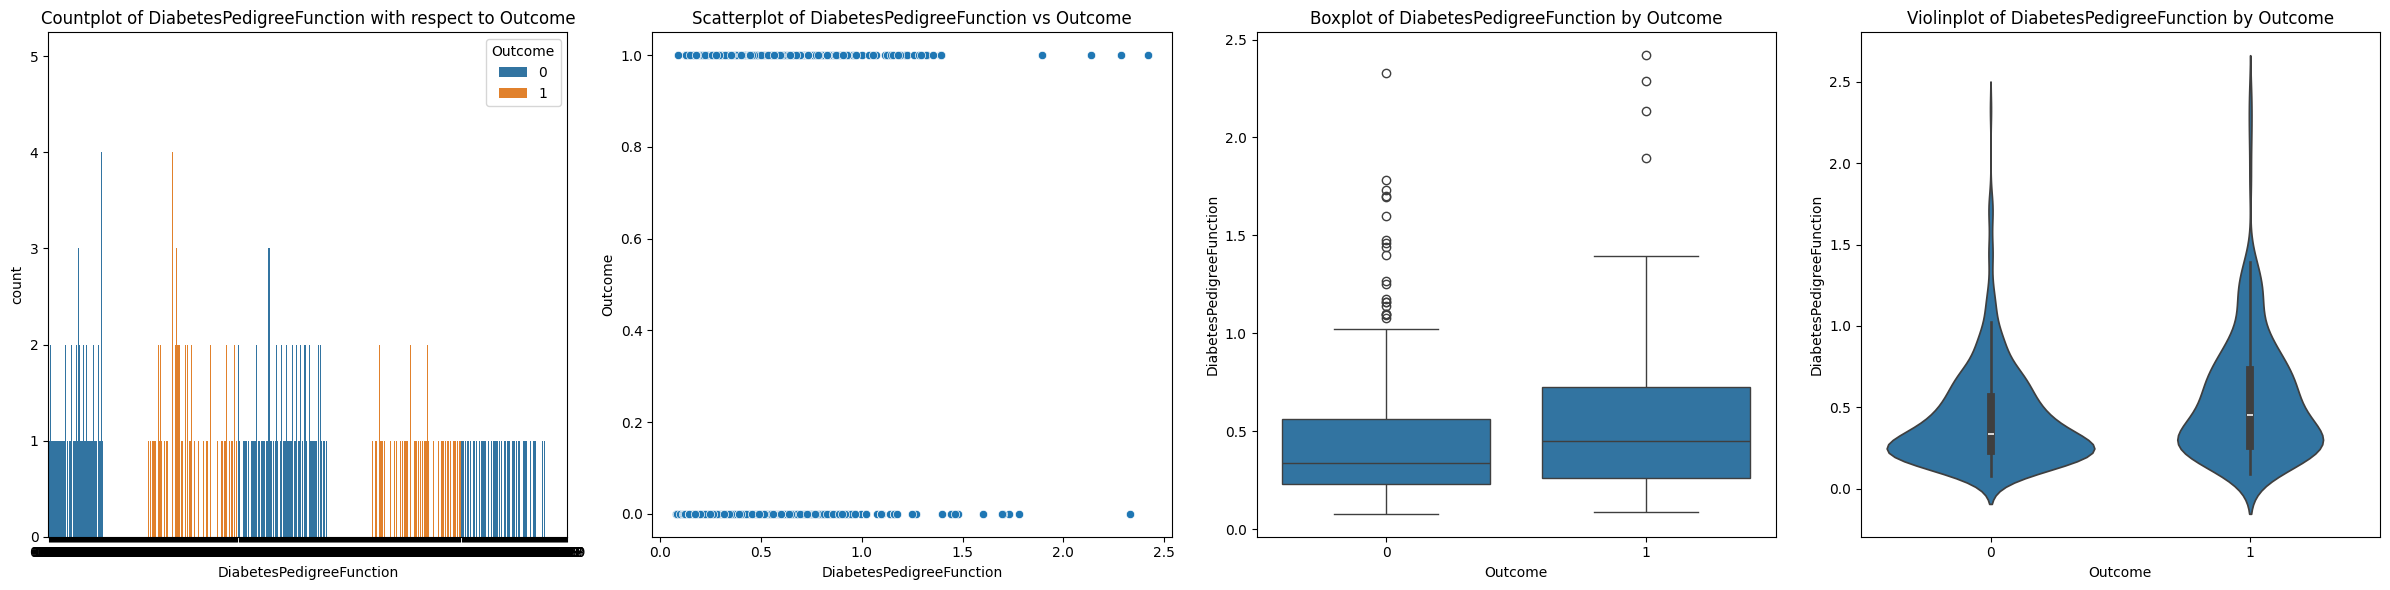

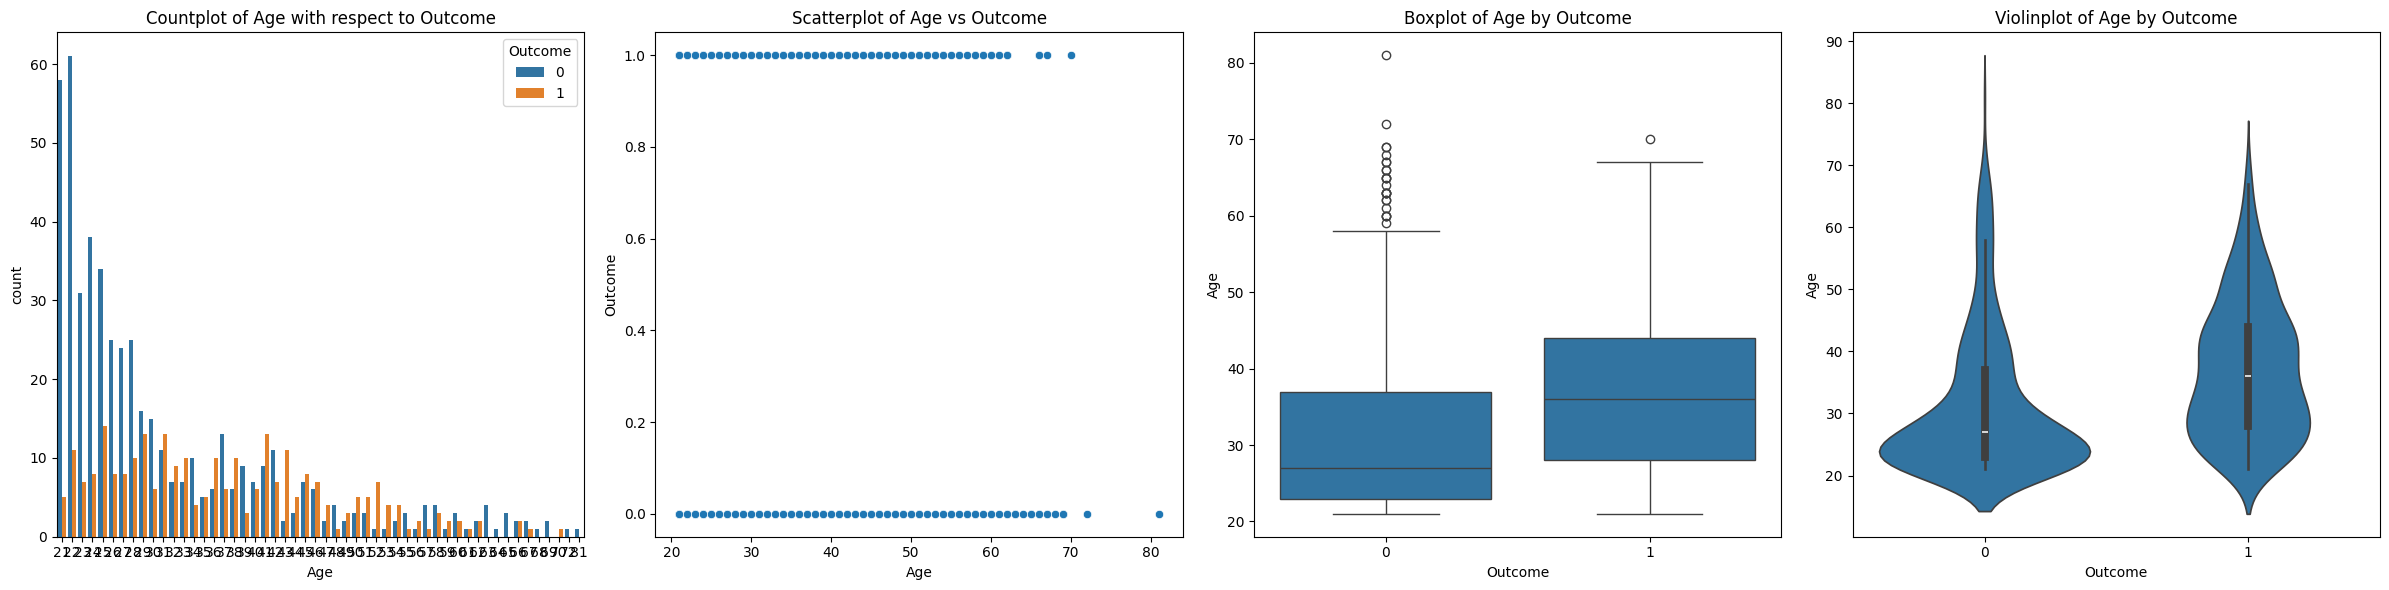

In [113]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in col:
    findrelation(feature, 'Outcome', df)

<Axes: >

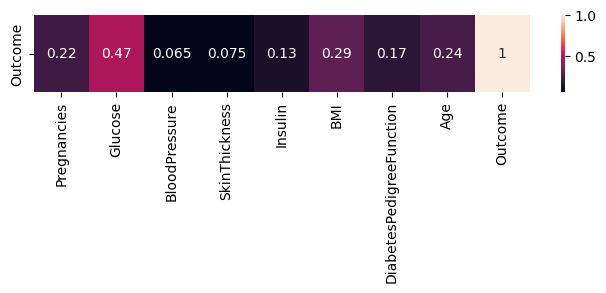

In [107]:
plt.figure(figsize=(8,1))
sns.heatmap(df.corr().tail(1),annot=True)

<Axes: >

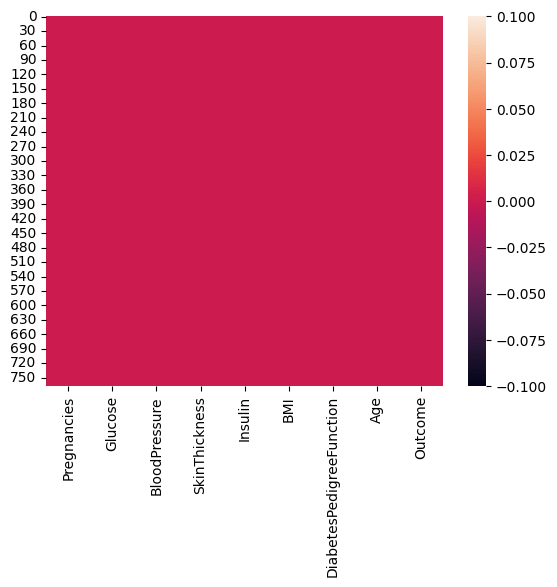

In [109]:
sns.heatmap(df.isnull())

In [110]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [111]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [120]:
model=LogisticRegression(max_iter=1000,solver='lbfgs')
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [123]:
model.score(X_test,y_test)

0.7480314960629921